In [158]:
from sklearn.model_selection import train_test_split
import numpy as np

In [159]:
X = [] 
y = []
with open("datingTestSet2.txt","r") as fr:
    
    txt_data = fr.readlines() # 读入文本所有行

    for line in txt_data: 
        
        line = line.strip().split() #去掉头尾多余字符 并且切分
        # ['40920', '8.326976', '0.953952', '3']

        X.append( line[0:3] )
        y.append( line[-1] )

# 转化成numpy数组便于处理
X = np.array( X ).astype('float64') # 原数组中都是字符串 需要转化成数字
y = np.array( y ).astype('int64')
# from sklearn import datasets
# iris = datasets.load_iris()
# X = iris.data
# y = iris.target

In [160]:
# 注意axis的选择
# 若axis缺省 则是求解整个矩阵X中所有数字的最值
# axis=0 返回每一列的最大值
# axis=1 返回每一行的最大值

def min_Max_norm(X):
    X_max = X.max(axis=0)
    X_min = X.min(axis=0)
    return (X - X_min)/(X_max-X_min)

In [161]:
X = min_Max_norm(X) # 归一化
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=2003) # 切分数据集

In [162]:
from collections import Counter

def knn_classify(X, y, test_exam, K):
    distance = [ np.sqrt( np.sum((test_exam-x)**2) ) for x in X] # 计算距离
    knn = y[ np.argsort(distance)[:K] ] # 排序后 根据索引取出K近邻的y值
    return list(Counter(knn))[0]

    # Counter() 返回一个字典 key:value
    # key -> 出现的元素
    # value -> 出现的次数
    # 转换成列表 取出第一个数字记为出现最多的值

    # a = np.array([200,100,300,400])
    # a.argsort() # [1,0,2,3]  || a = np.argsort(a)

def knn_regression(X,y,test_exam,K):
    distance = [ np.sqrt( np.sum((test_exam-x)**2) ) for x in X] # 计算距离
    knn = y[distance.argsort()[:K]] # 排序后 根据索引取出K近邻的y值
    return np.mean(knn) # 回归问题 返回平均值


In [163]:
def predict(X_train, y_train, X_test, K):
    return np.array( [ knn_classify(X_train, y_train, data, K) for data in X_test ] ) # 预测

In [164]:
def accuracy(y_pred, y_test):
    return np.count_nonzero((y_pred==y_test)==True) / len(y_test) # 计算正确率

In [165]:
from sklearn.model_selection import KFold

def KFoldCrossValidation(X, y, K):
    kf = KFold(n_splits=5) # 10折交叉验证
    result = []
    for X_train_i,X_test_i in kf.split(X):
        result.append( accuracy( predict( X[X_train_i] , y[X_train_i] , X[X_test_i] , K ) , y[X_test_i]) )
    return np.mean( result )

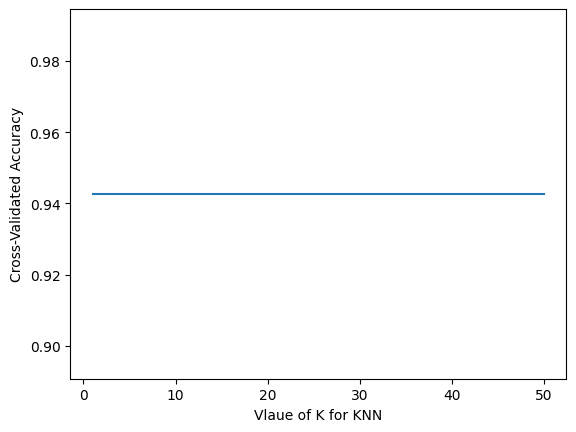

In [166]:
import matplotlib.pyplot as plt


k_range = range(1, 51)
k_scores = []
k_max = 0
k_maxScore = 0

for k in k_range:
    k_scores.append( KFoldCrossValidation( x_train , y_train, k ) )
    if k_scores[-1] > k_maxScore:
        k_maxScore = k_scores[-1]
        k_max = k

plt.plot(k_range, k_scores)
plt.xlabel('Vlaue of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()



In [167]:
print( "Accuracy =", accuracy( predict( x_train , y_train , x_test , k_max ) , y_test ))

Accuracy = 0.948
